This notebook creates a linear regression model to Predict Total Element Score vs Total Component Score

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#Read in all data from file
scores = pd.read_csv('performances.csv')

#If needed, here's how to change missing values to null & drop
#First replace the term with NaN. In this case, '?' represens missing values
# - scores.replace('?', np.nan, inplace = True)
#Then drop NaNs, reset index, and drop unecessary columns by assigning a new variable
# - scores_df = scores.dropna().reset_index().drop(['...], axis=1)

#Rids unnecessary columns
scores_df = scores.drop(['performance_id','competition','program','name','nation','rank','starting_number','total_segment_score','total_deductions'], axis=1)

# Change the datatype of a column as per the requirement
scores_df[['total_element_score','total_component_score']] = scores_df[['total_element_score','total_component_score']].astype(dtype = 'float64')

Intercept:  [4.49945739]
Slope:  [[0.93079444]]
Mean Squared Error: 33.71966647321568
Root Mean Squared Error: 5.8068637381305654
R2 Value: 0.891391965785841


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


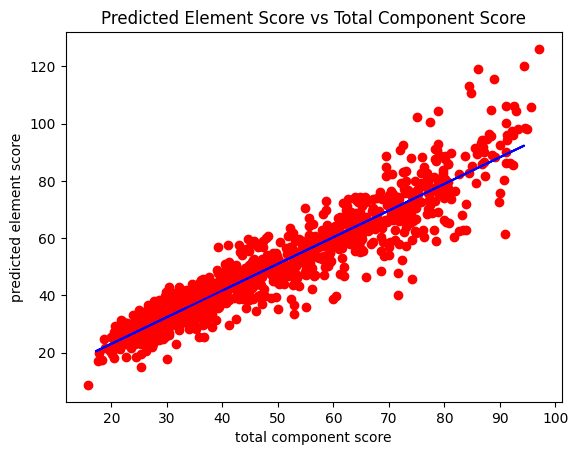

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#Assign axes by reshaping them to ensure one column 
X = scores_df['total_component_score'].values.reshape(-1, 1)
y = scores_df['total_element_score'].values.reshape(-1, 1)

#Split into random training and testing sets. '_test's should be the same size, '_train's should be the same size
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print intercept and slope:
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)

# Predicting the values
y_pred = model.predict(X_test)


# Evaluating the model

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared = False))
print('R2 Value:', r2_score(y_test, y_pred))

# Visualizing the training Test Results
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Predicted Element Score vs Total Component Score')
plt.ylabel('predicted element score')
plt.xlabel('total component score')
plt.show()